## Data Science Salaries Year 2023 Analysis

Source: Kaggle https://www.kaggle.com/datasets/arnabchaki/data-science-salaries-2023

In [1]:
# Load libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/Users/chewweetnee/Desktop/Python Project/ds_salaries.csv")

## Exploratory Data Analysis

In [3]:
### EDA
df.shape

(3755, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [5]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [6]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


## Data Cleaning

#### Steps
1. Change data type
2. Check for missing data
3. Group job title to 3 group for better analysis
4. Drop unnecesary columns & records
5. Rename experience level, remote ratio for better understanding

#### 1. Change data types

In [7]:
df['work_year'] = df['work_year'].map(str)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   object
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(3), object(8)
memory usage: 322.8+ KB


#### 2. Check for missing data

In [9]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

#### 3. Check number of job title and group them to 3 categories

In [10]:
df.job_title.unique()

array(['Principal Data Scientist', 'ML Engineer', 'Data Scientist',
       'Applied Scientist', 'Data Analyst', 'Data Modeler',
       'Research Engineer', 'Analytics Engineer',
       'Business Intelligence Engineer', 'Machine Learning Engineer',
       'Data Strategist', 'Data Engineer', 'Computer Vision Engineer',
       'Data Quality Analyst', 'Compliance Data Analyst',
       'Data Architect', 'Applied Machine Learning Engineer',
       'AI Developer', 'Research Scientist', 'Data Analytics Manager',
       'Business Data Analyst', 'Applied Data Scientist',
       'Staff Data Analyst', 'ETL Engineer', 'Data DevOps Engineer',
       'Head of Data', 'Data Science Manager', 'Data Manager',
       'Machine Learning Researcher', 'Big Data Engineer',
       'Data Specialist', 'Lead Data Analyst', 'BI Data Engineer',
       'Director of Data Science', 'Machine Learning Scientist',
       'MLOps Engineer', 'AI Scientist', 'Autonomous Vehicle Technician',
       'Applied Machine Learning Sc

In [11]:
df.job_title.nunique()

93

#### As there is 93 unique job title exist in the data, 
For data analysis purpose,job titles have been grouped into 3 categories
1. Data Analyst
2. Data Scientist 
3. Data Engineer

This grouping is primarily based on the output of ChatGPT with some minor and manual adjustment.

In [12]:
job_cat = {
    'Data Analyst': [
        'Data Analyst',
        'Data Quality Analyst',
        'Compliance Data Analyst',
        'Data Operations Analyst',
        'BI Analyst',
        'Insight Analyst',
        'Marketing Data Analyst',
        'Financial Data Analyst',
        'Lead Data Analyst',
        'Staff Data Analyst',
        'Business Data Analyst',
        'BI Data Analyst',
        'BI Developer',
        'Power BI Developer',
        'Principal Data Analyst',
        'Finance Data Analyst',
        'Data Analytics Lead',
        'Data Analytics Consultant',
        'Product Data Analyst'
    ],
    'Data Scientist': [
        'Principal Data Scientist',
        'Applied Scientist',
        'Research Scientist',
        'Applied Data Scientist',
        'Data Analytics Manager',
        'Lead Data Scientist',
        'Director of Data Science',
        'Machine Learning Scientist',
        'Data Science Lead',
        'Data Science Consultant',
        'Deep Learning Researcher',
        'Data Science Engineer',
        'Machine Learning Research Engineer',
        'NLP Engineer',
        'Machine Learning Developer',
        'Principal Machine Learning Engineer',
        'Data Scientist Lead',
        'Staff Data Scientist',
        'Product Data Scientist',
        'Machine Learning Manager',
        'Head of Machine Learning',
        'Lead Machine Learning Engineer',
        'Data Science Manager',
        'Data Scientist',
        'AI Developer',
        'Machine Learning Researcher',
        'AI Scientist',
        'AI Programmer',
        'Autonomous Vehicle Technician',
        'Applied Machine Learning Scientist', 
        'AI Programmer',
        'Data Analytics Specialist',
        'Head of Data Science',
        '3D Computer Vision Researcher',
        'Data Science Tech Lead'
        
    ],
    'Data Engineer': [
        'Data Modeler',
        'Data Strategist',
        'Data Engineer',
        'Computer Vision Engineer',
        'ETL Engineer',
        'Data DevOps Engineer',
        'Data Architect',
        'Applied Machine Learning Engineer',
        'Big Data Engineer',
        'Data Specialist',
        'BI Data Engineer',
        'Cloud Database Engineer',
        'Data Infrastructure Engineer',
        'Software Data Engineer',
        'Data Operations Engineer',
        'Machine Learning Infrastructure Engineer',
        'Cloud Data Engineer',
        'ETL Developer',
        'Cloud Data Architect',
        'Lead Data Engineer',
        'Principal Data Engineer',
        'ML Engineer',
        'Research Engineer',
        'Analytics Engineer',
        'Business Intelligence Engineer',
        'Machine Learning Engineer',
        'Head of Data',
        'Data Manager',
        'MLOps Engineer',
        'Deep Learning Engineer',
        'Data Analytics Engineer',
        'Data Management Specialist',
        'Principal Data Architect',
        'Machine Learning Software Engineer',
        'Big Data Architect',
        'Computer Vision Software Engineer',
        'Marketing Data Engineer',
        'Azure Data Engineer',
        'Data Lead',
        'Manager Data Management'
    ]
}


In [13]:
def map_job_cat(job):
    for key,value in job_cat.items():
        if job in value:
            return key
    return job

df['job_category']= df['job_title'].map(map_job_cat)
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_category
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L,Data Scientist
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S,Data Engineer
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S,Data Engineer
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M,Data Scientist
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M,Data Scientist


#### Check is it all job title match with the assigned job category

In [14]:
df.job_category.unique()

array(['Data Scientist', 'Data Engineer', 'Data Analyst'], dtype=object)

#### 4. Drop unnecessary columns & records

In [15]:
df.drop(['salary','salary_currency'],inplace = True, axis=1 )

In [16]:
df.work_year.value_counts(normalize=True)

2023    0.475366
2022    0.443142
2021    0.061252
2020    0.020240
Name: work_year, dtype: float64

In [17]:
df= df[df.work_year.isin(['2022','2023'])] ## include only data recorded in latest 2 years 

In [18]:
df.employment_type.value_counts(normalize=True)

FT    0.994201
PT    0.002320
CT    0.001740
FL    0.001740
Name: employment_type, dtype: float64

In [19]:
df= df[df.employment_type.isin(['FT'])] 

##### Since 99% of the recorded data corresponds to full-time jobs, I will exclude all data that falls into other categories

#### 5. Rename values for better understanding

In [20]:
pd.unique(df[['experience_level','remote_ratio']].values.ravel('k'))

array(['SE', 'EN', 'MI', 'EX', 100, 0, 50], dtype=object)

In [18]:
### experience_level: SE = Senior, MI = Mid , EN = Entry, EX = Expert
### remote_ratio: 100 = On-site, 50 = Hybrid, 0 = Remote

In [21]:
df['experience_level'] =df['experience_level'].replace({'SE':'Senior', 'MI':'Mid', 'EN':'Entry', 'EX':'Expert'})
df['remote_ratio'] = df['remote_ratio'].replace({100:'On Site', 50:'Hybrid', 0:'Remote'})

In [22]:
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_category
0,2023,Senior,FT,Principal Data Scientist,85847,ES,On Site,ES,L,Data Scientist
3,2023,Senior,FT,Data Scientist,175000,CA,On Site,CA,M,Data Scientist
4,2023,Senior,FT,Data Scientist,120000,CA,On Site,CA,M,Data Scientist
5,2023,Senior,FT,Applied Scientist,222200,US,Remote,US,L,Data Scientist
6,2023,Senior,FT,Applied Scientist,136000,US,Remote,US,L,Data Scientist


## Data Visualization

#### Salary Distribution

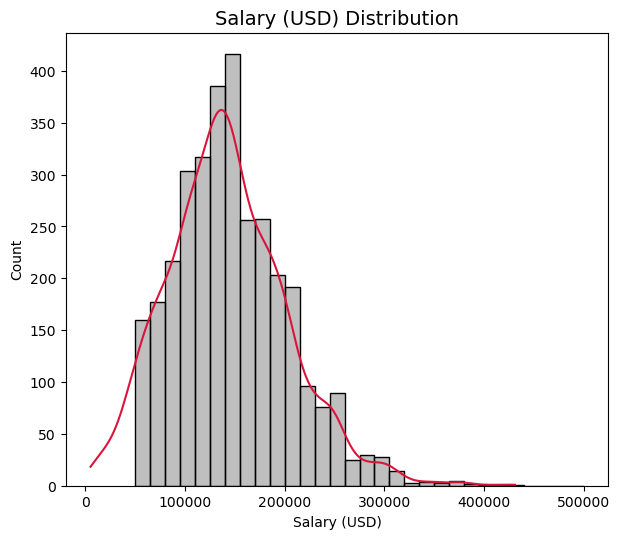

In [23]:
fig = plt.figure(figsize=(7,6), dpi=100)

fig = sns.histplot(x='salary_in_usd', data=df, kde= True, color='gray',bins=30, binrange=(50000,500000))
plt.title('Salary (USD) Distribution', fontsize=14, color='black', loc='center')
plt.xlabel('Salary (USD)',fontsize=10, color='black')
plt.ylabel('Count', fontsize=10, color='black')
fig.lines[0].set_color('crimson')

#### Top 10 Most Popular Jobs 

In [24]:
top_10_job = df.job_title.value_counts().head(10)
top_10_job

Data Engineer                986
Data Scientist               772
Data Analyst                 578
Machine Learning Engineer    266
Analytics Engineer           102
Data Architect                98
Research Scientist            70
Applied Scientist             58
Data Science Manager          51
Research Engineer             37
Name: job_title, dtype: int64

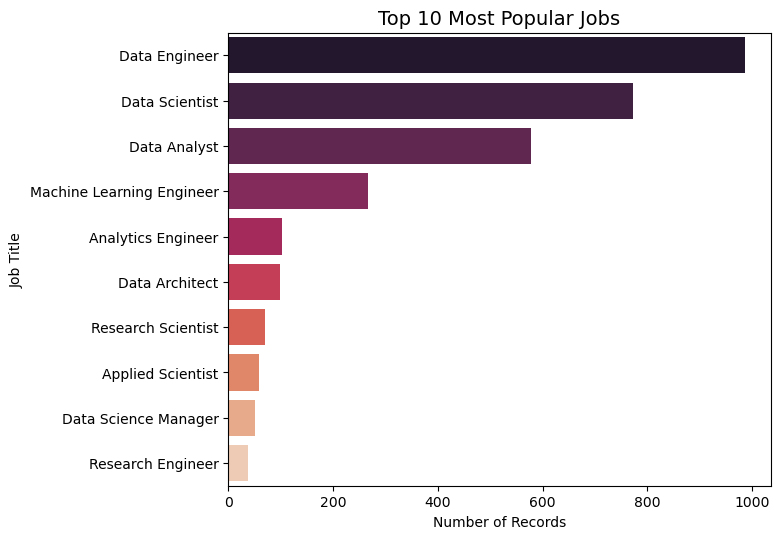

In [25]:
fig = plt.figure(figsize = (7,6), dpi=100)

sns.countplot(y=df['job_title'],data=df, order= pd.value_counts(df['job_title']).iloc[:10].index, palette='rocket')

plt.title('Top 10 Most Popular Jobs', fontsize = 14, color = 'black', loc = 'center')
plt.xlabel('Number of Records', fontsize = 10, color = 'black')
plt.ylabel('Job Title', fontsize = 10, color= 'black')
plt.xticks(fontsize = 10, color = 'black')
plt.yticks(fontsize = 10, color = 'black')

plt.show()

#### Top 10 Highest Pay Jobs

In [26]:
avg_salary = df.groupby('job_title')['salary_in_usd'].mean().reset_index().sort_values('salary_in_usd',ascending=False).head(10)
avg_salary

,job_title,salary_in_usd
45,Data Science Tech Lead,375000.000000
34,Data Lead,212500.000000
27,Data Analytics Lead,211254.500000
75,Marketing Data Analyst,200000.000000
44,Data Science Manager,196964.901961
52,Director of Data Science,195601.800000
73,Machine Learning Software Engineer,192420.000000
8,Applied Scientist,190264.482759
80,Principal Machine Learning Engineer,190000.000000
56,Head of Data,181533.714286


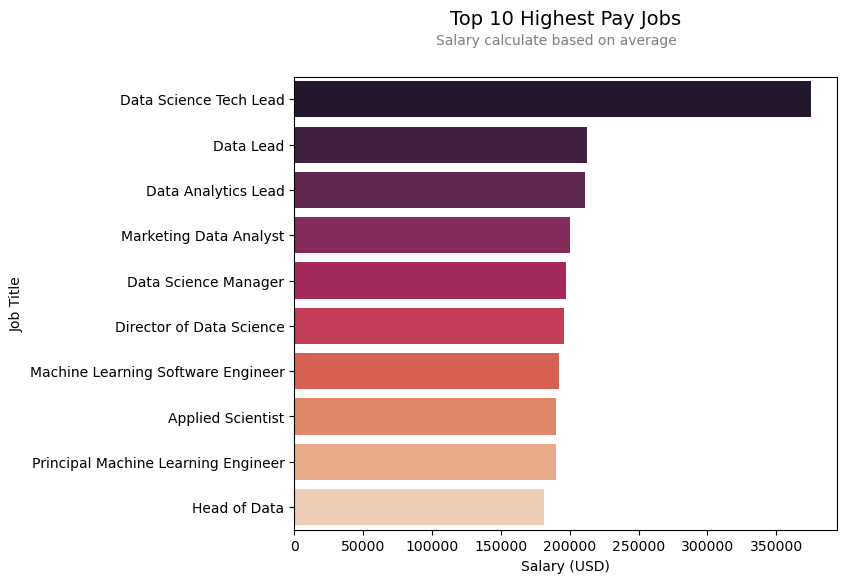

In [27]:
fig=plt.figure(figsize=(7,6),dpi=100)

sns.barplot(x='salary_in_usd', y='job_title',data=avg_salary, palette= 'rocket')

plt.title('Top 10 Highest Pay Jobs\n\n', fontsize=14, loc='center')
plt.suptitle('\nSalary calculate based on average\n',fontsize=10,color='gray')
plt.xlabel('Salary (USD)', fontsize = 10, color = 'black')
plt.ylabel('Job Title', fontsize = 10, color = 'black')
plt.xticks(fontsize=10, color ='black')
plt.yticks(fontsize=10, color = 'black')

plt.show()

#### Insight: 
1. Data Science Tech Lead has the highest average salary compared to other job roles, 76% higher than the Data Lead.
<br>
<br>

#### Salaries based on Job Category

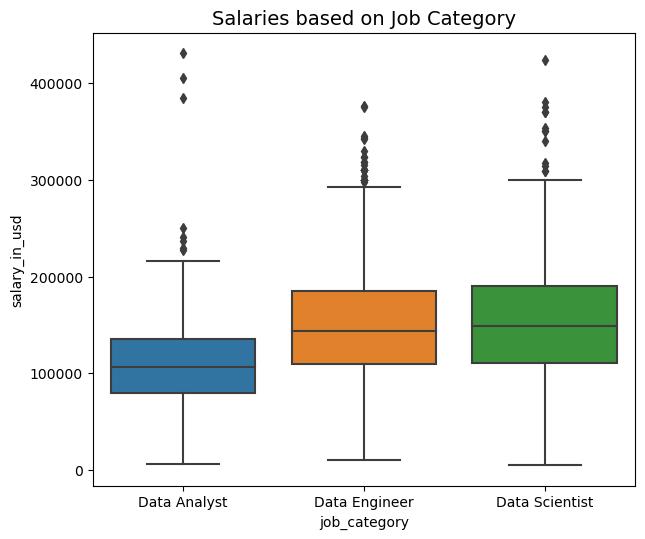

In [28]:
fig = plt.figure(figsize=(7,6),dpi=100)

median_salary = df.groupby('job_category')['salary_in_usd'].median().reset_index().sort_values('salary_in_usd')
median_salary

sns.boxplot(x='job_category', y='salary_in_usd', data=df, order=median_salary['job_category'])
plt.title('Salaries based on Job Category', fontsize=14, color= 'black', loc='center')


plt.show()


In [29]:
analyst_salary = df[(df.job_category == 'Data Analyst')].sort_values('salary_in_usd',ascending=False)
analyst_salary.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_category
2011,2022,Mid,FT,Data Analyst,430967,GB,Remote,GB,M,Data Analyst
3463,2022,Senior,FT,Data Analytics Lead,405000,US,On Site,US,L,Data Analyst
1288,2023,Senior,FT,Data Analyst,385000,US,Remote,US,M,Data Analyst
801,2023,Senior,FT,Data Analyst,250000,US,On Site,US,M,Data Analyst
1700,2023,Senior,FT,Data Analyst,240500,US,Remote,US,M,Data Analyst


#### Insights:
1. Data Analyst generally have the lowest salary compared to Data Engineer and Data Scientist, however there are some outliers where salary recorded above 380k.
2. The salaries for Data Engineer and Data Scientist are comparable. 
<br>
<br>

#### Salary based on Experience Level

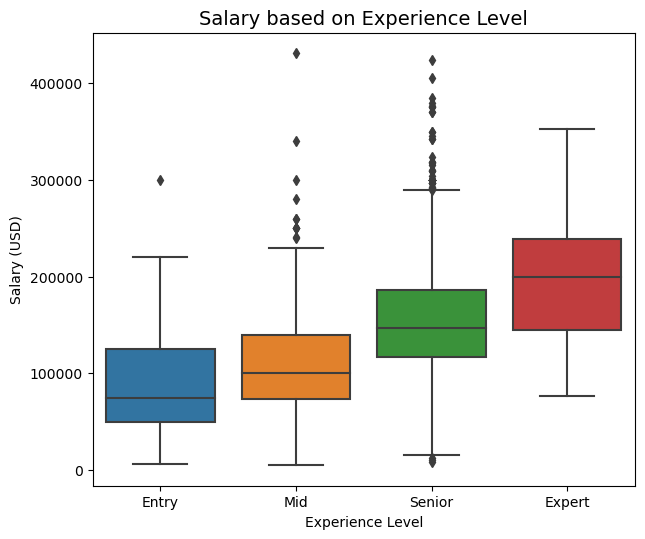

In [30]:
## calculate median of the salary and use it to order the experience level 
median_salary = df.groupby('experience_level')['salary_in_usd'].median().reset_index().sort_values('salary_in_usd')

fig = plt.figure(figsize=(7,6),dpi=100)
sns.boxplot(x='experience_level',y='salary_in_usd',data=df, order = median_salary['experience_level'])

plt.title('Salary based on Experience Level', fontsize=14, color='black', loc='center')
plt.xlabel('Experience Level', fontsize=10, color='black')
plt.ylabel('Salary (USD)', fontsize=10, color='black')
plt.xticks(fontsize=10, color='black')
plt.yticks(fontsize=10, color='black')

plt.show()

#### Insight
1. The salary scale follows a progressive structure, salaries increase when individual progress from entry level to expert level.
<br>
<br>

#### Salary based on Remote Ratio

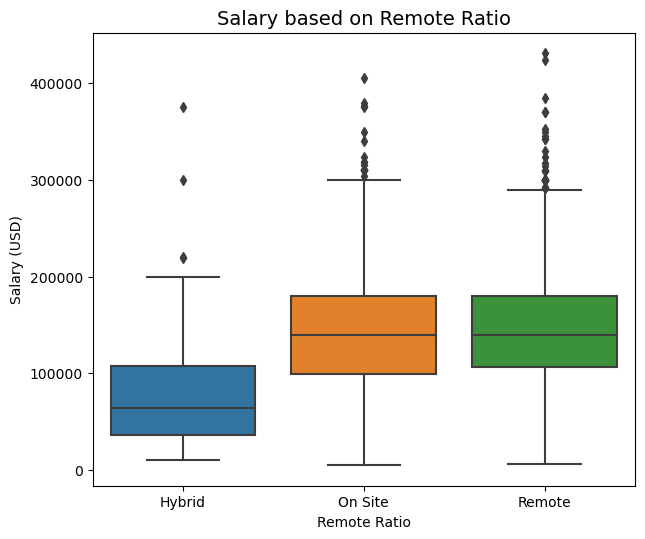

In [31]:
### Calculate median of the salary to order remote ratio in the graph
median_=df.groupby('remote_ratio')['salary_in_usd'].median().reset_index().sort_values('salary_in_usd')

fig = plt.figure(figsize = (7,6), dpi=100)
sns.boxplot(x='remote_ratio',y='salary_in_usd',data=df, order= median_['remote_ratio'])

plt.title('Salary based on Remote Ratio', fontsize= 14, loc='center')
plt.xlabel('Remote Ratio', fontsize=10, color='black')
plt.ylabel('Salary (USD)', fontsize=10, color='black')
plt.xticks(fontsize=10, color='black')
plt.yticks(fontsize=10, color='black')

plt.show()

In [32]:
df.remote_ratio.value_counts()

Remote     1873
On Site    1470
Hybrid       86
Name: remote_ratio, dtype: int64

#### Insight:
1. Salaries for On Site and Remote work are comparable.
2. Lower salary observation for hybrid roles may be attributed to the limited data available specifically for this category.
<br>
<br>

#### Salaries by Company Size

Text(0, 0.5, 'Salary (USD)')

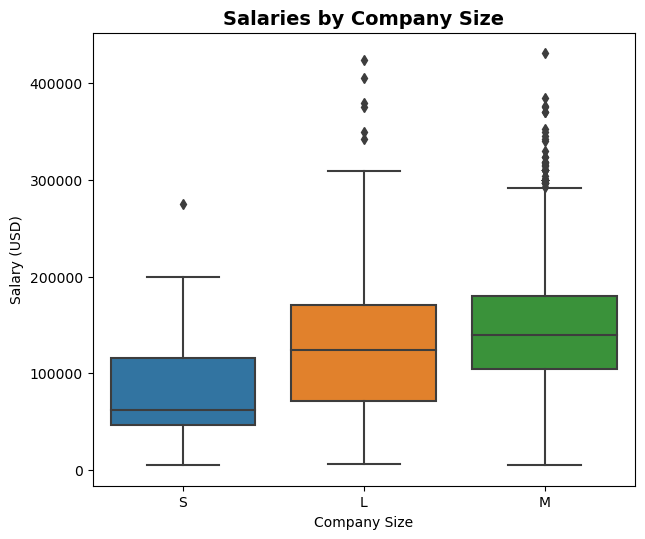

In [33]:
fig = plt.figure(figsize=(7,6),dpi=100)
median_salary= df.groupby('company_size')['salary_in_usd'].median().reset_index().sort_values('salary_in_usd')
median_salary
sns.boxplot(x='company_size',y='salary_in_usd',data=df,order=median_salary['company_size'])

plt.title('Salaries by Company Size',fontsize=14, fontweight='bold')
plt.xlabel('Company Size',fontsize=10)
plt.ylabel('Salary (USD)',fontsize=10)

In [34]:
df.company_size.value_counts()

M    3073
L     288
S      68
Name: company_size, dtype: int64

#### Insight:

1. The median salary suggests that M-sized companies tend to offer slightly higher salaries compared to L-sized companies, but the conclusion may be affected by the disparity in the number of data points between the two categories.
2. Limited amount of data recorded for S-sized companies might contribute to their lower salary offerings

## Conclusion:
1. Data Scientist and Data Engineer generally have higher salary compared to Data Analyst.
2. Salary increases as level of expertise increases.
3. Remote ratio has no influence on salary